# k-Means Clustering

In [1]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random


## k-Means at a glance

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

# Star Wars Galaxy

C:\Users\NimeshsinhDesai\Anaconda3\envs\SelfDrivingCar\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


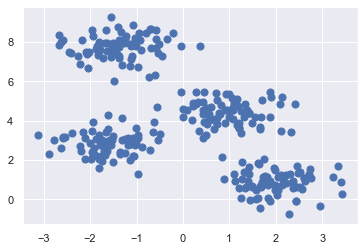

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Your code
Use  the cells below to implement Kmeans from scratch. Break down the entire problem into smaller subsets. For example, **using pseudocode**

For example: 

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 
   
In order to practice the concepts taught in the lecture by Antonio... **Try to implement it using a class**!

*Tip: Common Kmeans intialization problems have to do with the seed. Try to initiate it several times!*

In [3]:
""" code for reference"""
class KMeans:
    def __init__(self, n_clusters = 2):
        self.n_clusters = n_clusters
        self.centroids = []
        self.get_centroids = []
        
    
    def init_centroied(self, df): ## Claculation for the first four centers
        self.df = df
        init_centroieds = random.sample(range(0, len(self.df)), k=self.n_clusters)     
        for i in init_centroieds:
            self.centroids.append(df[i])
        return self.centroids
        

    def calc_distance(self,X1, X2):  # Calculate the distance from centers
        return(sum((X1 - X2)**2))**0.5

    def findClosestCentroids(self,ic, df): # Calculate the closest center for individual data points
        assigned_centroid = []
        for i in df:
            distance=[]
            for j in ic:
                distance.append(self.calc_distance(i, j))
            assigned_centroid.append(np.argmin(distance))
        return assigned_centroid

    def calc_centroids(self,clusters, df):
        new_centroids = []
        new_df = pd.concat([pd.DataFrame(df), pd.DataFrame(clusters, columns=['cluster'])],
                          axis=1)
        for c in set(new_df['cluster']):
            current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
            cluster_mean = current_cluster.mean(axis=0)
            new_centroids.append(cluster_mean)
        return new_centroids
    
    def fit(self, df): ## not completed 
        centroids = self.init_centroied(df)
#         print('Centroid1', centroids)
        c = True 
    
        while c == True:            
            pre_centroids = centroids
#             print(pre_centroids)
            get_centroids = self.findClosestCentroids(centroids, df)
            centroids = self.calc_centroids(get_centroids, df)
            centroids = np.array(centroids)
#             print('centroids',centroids)
            
            result = [i==j for i, j in zip(centroids, pre_centroids)]
            result = np.array(result)
#             print('result',result)
            
            if result.all():
                c= False
                self.centroids = centroids
                self.get_centroids = get_centroids
               

    def predict(self, df):
        y_predict = self.findClosestCentroids(self.centroids, df)
        return y_predict
    

In [4]:
model = KMeans(n_clusters = 4)
model.fit(X)

In [5]:
y_kmeans = model.predict(X)


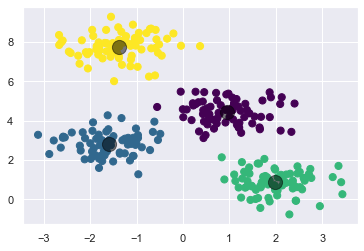

In [6]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1],s=50, c=y_kmeans , cmap='viridis')
plt.scatter(np.array(model.centroids)[:, 0], np.array(model.centroids)[:, 1],s=200, color='black', alpha=0.5)
plt.show()

# Ideal Result
You should be able to obtain similar results as the K-means algorithm for the SkLearn library. 
- Compare how well you classify! 
- Justify why you pick X clusters, since you technically shouldn´t know the answer. 

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

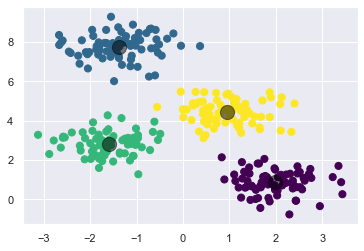

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# BONUS Dataset: Tatooine Map
Now, time to do it for **any dimension of n_features** of X

In [217]:
# Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X, y_true = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

df= pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.506390,-0.057663,1.643606,4.426560,0.564538
1,-9.304401,7.410423,2.634051,1.421497,6.529532
2,-2.874097,2.395984,1.424139,3.999277,0.486795
3,-1.747953,0.712163,0.784197,4.408828,0.959651
4,-1.409234,8.909214,7.602814,-0.969191,2.647356
...,...,...,...,...,...
3995,-3.124214,9.833733,7.872693,-1.033497,2.852330
3996,-3.138745,9.688679,7.624227,-1.525713,3.853165
3997,-1.284945,0.625381,1.833122,4.583487,0.905785
3998,-2.542347,-0.165675,2.671166,5.036737,0.871050


# Your Code
- You can do it with Kmeans right away but...
- Can you also implement K-means ++?
- What about PCA + Kmeans?

Compute the execution time for each! 
- Which is faster? 
- Which is more accurate?

# Ideal Result

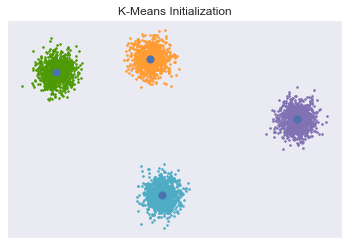

In [23]:
# Calculate seeds from kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_data = kmeans.cluster_centers_
centers_init = kmeans.cluster_centers_
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    # note that this is a plot only in two dimensions
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means Initialization")
plt.xticks([])
plt.yticks([])
plt.show()